In [1]:
import pandas as pd
import os
import ModelEvaluation
from confidence_intervals import evaluate_with_conf_int
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

In [3]:
#Load in the dataframe containing all model predictions on the FEMH test set
femh_prediction_df = pd.read_csv(f'{grandparent_dir}/Predict Audio/FEMH_ModelPredictions.csv', index_col=0)
print(femh_prediction_df.shape)
femh_prediction_df.head()

(660, 74)


,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Age_Sex_Symptoms prediction,LR_FeatureStates_Age_Sex_Symptoms probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_FeatureStates_Symptoms prediction,LR_FeatureStates_Symptoms probability,...,SVM_MFCC_Symptoms prediction,SVM_MFCC_Symptoms probability,SVM_OpenSmile_Age_Sex prediction,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Age_Sex_Symptoms prediction,SVM_OpenSmile_Age_Sex_Symptoms probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability,SVM_OpenSmile_Symptoms prediction,SVM_OpenSmile_Symptoms probability
0,Atrophy-0001apo,Benign,Benign,0.001301,Benign,0.157229,Benign,0.000026,Benign,0.221742,...,Benign,0.008403,Benign,0.010395,Benign,0.017766,Benign,0.019887,Benign,0.025877
1,Atrophy-0400og6,Benign,Benign,0.002063,Benign,0.213735,Benign,0.000276,Benign,0.451704,...,Malignant,0.055249,Benign,0.008386,Benign,0.015901,Benign,0.014908,Benign,0.026531
2,Atrophy-0500cg6,Benign,Benign,0.070688,Malignant,0.711418,Benign,0.044419,Malignant,0.573204,...,Malignant,0.131172,Malignant,0.123806,Malignant,0.083921,Malignant,0.047273,Malignant,0.079512
3,Atrophy-0601ntf,Benign,Malignant,0.961759,Malignant,0.625363,Malignant,0.926107,Malignant,0.625380,...,Benign,0.022580,Benign,0.035384,Benign,0.018849,Benign,0.024361,Benign,0.039769
4,Atrophy-07017ip,Benign,Benign,0.000648,Benign,0.124255,Benign,0.000029,Benign,0.321406,...,Benign,0.014545,Benign,0.011126,Malignant,0.042882,Benign,0.025011,Malignant,0.060018


In [4]:
#Load in the dataframe containing all model predictions on the FEMH test set
svd_prediction_df = pd.read_csv(f'{grandparent_dir}/Predict Audio/SVD_ModelPredictions.csv', index_col=0)
print(svd_prediction_df.shape)
svd_prediction_df.head()

(1333, 38)


,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_MFCC_Age_Sex prediction,LR_MFCC_Age_Sex probability,LR_MFCC_Rec_Only prediction,LR_MFCC_Rec_Only probability,...,SVM_FeatureStates_Rec_Only prediction,SVM_FeatureStates_Rec_Only probability,SVM_MFCC_Age_Sex prediction,SVM_MFCC_Age_Sex probability,SVM_MFCC_Rec_Only prediction,SVM_MFCC_Rec_Only probability,SVM_OpenSmile_Age_Sex prediction,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability
0,1862-a_n,Benign,Benign,0.000022,Benign,0.003239,Benign,0.104404,Malignant,0.961383,...,Benign,0.013924,Benign,0.010579,Benign,0.033143,Benign,0.006626,Benign,0.025803
1,1645-a_n,Benign,Benign,0.001011,Benign,0.105273,Benign,0.090834,Benign,0.076010,...,Benign,0.014101,Benign,0.007667,Benign,0.011178,Benign,0.008834,Benign,0.024732
2,127-a_n,Benign,Benign,0.058224,Malignant,0.569727,Benign,0.196545,Benign,0.062510,...,Benign,0.018371,Benign,0.011847,Benign,0.007701,Benign,0.014359,Benign,0.020100
3,567-a_n,Benign,Malignant,0.998790,Malignant,0.960259,Benign,0.100787,Benign,0.000006,...,Malignant,0.028431,Benign,0.008248,Benign,0.025005,Benign,0.011961,Benign,0.016710
4,148-a_n,Benign,Malignant,0.936877,Malignant,0.969719,Benign,0.445125,Malignant,0.908002,...,Malignant,0.038451,Malignant,0.039404,Benign,0.011874,Benign,0.015009,Benign,0.017445


In [5]:
#Define the datasets, metric, algorithm, audio features, and classifier inputs
dataset_names=['FEMH', 'SVD']
metric = roc_auc_score
algorithms=['SVM']
audio_features=['FeatureStates', 'OpenSmile', 'MFCC']
input_features=['Rec_Only', 'Age_Sex']

#define the format of the columns to be used to calculate the metric 
column_format = '{algorithm}_{audio_feature}_{input_feature} probability'

#format the results table for plotting
results = ModelEvaluation.get_results_df([femh_prediction_df, svd_prediction_df], dataset_names, metric, algorithms, audio_features, input_features, column_format=column_format)

Formatting FEMH...
Processing SVM_FeatureStates_Rec_Only probability...
Processing SVM_OpenSmile_Rec_Only probability...
Processing SVM_MFCC_Rec_Only probability...
Processing SVM_FeatureStates_Age_Sex probability...
Processing SVM_OpenSmile_Age_Sex probability...
Processing SVM_MFCC_Age_Sex probability...
Formatting SVD...
Processing SVM_FeatureStates_Rec_Only probability...
Processing SVM_OpenSmile_Rec_Only probability...
Processing SVM_MFCC_Rec_Only probability...
Processing SVM_FeatureStates_Age_Sex probability...
Processing SVM_OpenSmile_Age_Sex probability...
Processing SVM_MFCC_Age_Sex probability...


In [6]:
results

FeatureStates  \
Dataset Input                                                         
FEMH    Rec_Only  (0.7601889763779528, (0.6645195435531496, 0.84...   
        Age_Sex   (0.7727244094488189, (0.6815643459662987, 0.85...   
SVD     Rec_Only  (0.6492379597642755, (0.5615897509419775, 0.73...   
        Age_Sex   (0.7155659418817314, (0.641595626217558, 0.785...   

                                                          OpenSmile  \
Dataset Input                                                         
FEMH    Rec_Only  (0.7416062992125985, (0.6755254504719296, 0.80...   
        Age_Sex   (0.8019527559055117, (0.742104414307055, 0.851...   
SVD     Rec_Only  (0.6146718146718146, (0.5216913183848546, 0.71...   
        Age_Sex   (0.7724243040032513, (0.7144548089787424, 0.82...   

                                                               MFCC  
Dataset Input                                                        
FEMH    Rec_Only  (0.7012913385826771, (0.5943833027999295, 0.80...  
        Age_Sex   (0.8068661417322834, (0.7196476539540803, 0.88...  
SVD     Rec_Only  (0.5918512497459865, (0.5030536251363159, 0.67...  
        Age_Sex   (0.7686649055070107, (0.6991060298268535, 0.83...

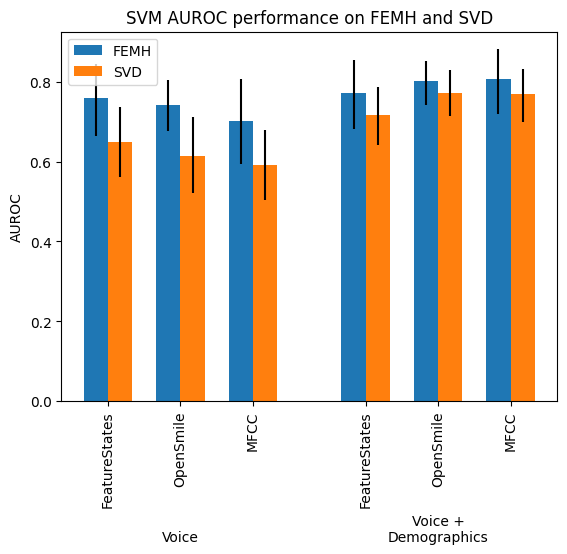

In [7]:
#define the mapping of the input names to make the graph more readable
input_map={'Rec_Only':'Voice',
          'Age_Sex':'Voice + Demographics'}

#plot the classification results
ModelEvaluation.plot_results(results, ylabel='AUROC', input_map=input_map, save_file='CompareDatasets.pdf', title='SVM AUROC performance on FEMH and SVD')